In [1]:
import os
from PIL import Image
import pandas as pd
import numpy as np

from img_utils import process_image

path = '/Volumes/CPSC587DATA/TRAINING_IMAGES'
csv_path = os.path.join(path, "info.csv")
info = pd.read_csv(csv_path)
img_list = []
for _, row in info.iterrows():
    img = Image.open(os.path.join(path, row['filename']))
    img = process_image(img)
    img_list.append(np.expand_dims(img, 0))
state_img = np.concatenate(tuple(img_list), axis=0)
state_img.shape

(1594, 66, 200, 3)

In [2]:
np.asarray(info[['steering_angle', 'throttle', 'speed']]).shape

(1594, 3)

In [5]:
from keras.utils import to_categorical
to_categorical(np.asarray(info['car_pos_idx']))

Using TensorFlow backend.


array([[ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.]])

In [33]:
from keras import Input
from keras.engine import Model
from keras.layers import BatchNormalization, Flatten
from keras.layers.convolutional import Conv2D

from img_utils import IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS

inputs = Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS))
values = inputs

layer_1 = Conv2D(32, (8, 8), activation='relu')
values = layer_1(values)

# layer_2 = Conv2D(64, (4, 4), activation='relu')
# values = layer_2(values)
# 
# layer_3 = Conv2D(64, (1, 1), activation='relu')
# values = layer_3(values)
values = Flatten()(values)
values = BatchNormalization()(values)
outputs = values

model = Model(inputs=inputs, outputs=outputs)

In [36]:
import numpy as np
import matplotlib.pyplot as plt

result = model.predict(img.reshape((1, IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS)))
result = np.squeeze(result)

result.shape, result.mean(), result.std()

((364384,), 11.547771, 17.585649)

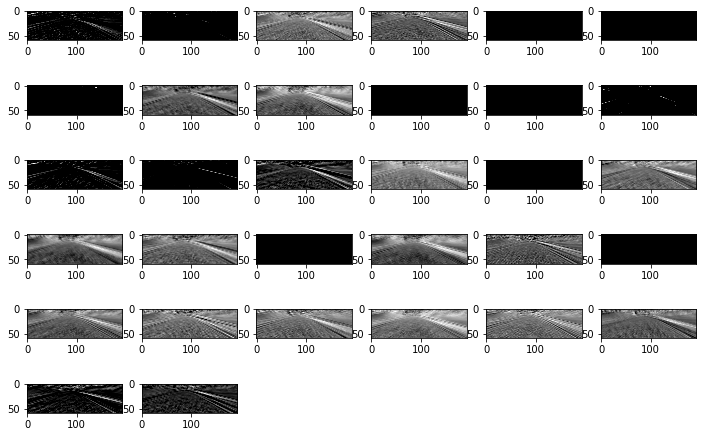

In [29]:
n = result.shape[2]
n = int(np.ceil(np.sqrt(n)))

fig = plt.figure(figsize=(12, 8))
for i in range(result.shape[2]):
    ax = fig.add_subplot(n, n, i + 1)
    ax.imshow(result[:, :, i], cmap='gray')
fig

In [45]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

labels = ['OFF_LEFT', 'OFF_RIGHT', 'ON_ROAD']

label_encoder = LabelEncoder()
one_hot_encoder = OneHotEncoder()

integer_encoded = label_encoder.fit_transform(labels)
print(integer_encoded)
# binary encode
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
one_hot_encoded = one_hot_encoder.fit_transform(integer_encoded)
print(one_hot_encoded)
# invert first example
inverted = label_encoder.inverse_transform([np.argmax(one_hot_encoded[0, :])])
print(inverted)


[0 1 2]
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
['OFF_LEFT']


In [46]:
from keras.layers import Convolution2D, Activation, Dense
from keras.models import Sequential
from keras.optimizers import Adam

model = Sequential()
model.add(Convolution2D(32, 8, 8, subsample=(4, 4), border_mode='same',
                        input_shape=(80, 80, 4)))  #80*80*4
model.add(Activation('relu'))
model.add(Convolution2D(64, 4, 4, subsample=(2, 2), border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(64, 3, 3, subsample=(1, 1), border_mode='same'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(2))

adam = Adam(lr=1e-4)
model.compile(loss='mse', optimizer=adam)

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 20, 20, 32)        8224      
_________________________________________________________________
activation_1 (Activation)    (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 10, 10, 64)        32832     
_________________________________________________________________
activation_2 (Activation)    (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
activation_3 (Activation)    (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6400)              0         
__________

/Users/es/.pyenv/versions/3.6.2/envs/cpsc587project/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (8, 8), input_shape=(80, 80, 4..., strides=(4, 4), padding="same")`
  import sys
/Users/es/.pyenv/versions/3.6.2/envs/cpsc587project/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (4, 4), strides=(2, 2), padding="same")`
  if __name__ == '__main__':
/Users/es/.pyenv/versions/3.6.2/envs/cpsc587project/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), strides=(1, 1), padding="same")`
  # This is added back by InteractiveShellApp.init_path()


In [9]:
from pos_detection_model import load_train_data

X, y = load_train_data()
X.shape, y.shape

In [10]:
X.shape, y.shape

((2709, 66, 200, 3), (2709,))

In [ ]:
sum(y == 3)


51

In [12]:
from keras.utils import to_categorical

to_categorical(y)

array([[ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.]])